# Pre-proecssing for Ausgrid Data

In this notebook I did: 
* Extract the PV generation data (only 'useful' ones)
* Here we select the data with maximum capacity of 9.99kW (ID=157)
* Split the PV data to 'summer' and 'winter' dividing by the Daylight Saving Time in Sydney.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)  # to display all columns of dataframes

In [2]:
%%time
# read csv
data2010 = pd.read_csv("../data/Ausgrid/2010-2011 Solar home electricity data.csv",skiprows=1,parse_dates=[4])
data2011 = pd.read_csv("../data/Ausgrid/2011-2012 Solar home electricity data v2.csv",skiprows=1,parse_dates=[4])
data2012 = pd.read_csv("../data/Ausgrid/2012-2013 Solar home electricity data v2.csv",skiprows=1,parse_dates=[4])
data2012

CPU times: user 1min 46s, sys: 1.21 s, total: 1min 47s
Wall time: 1min 47s


In [3]:
# useful customers found by Ratnam2015
useful_customers = [2,13,14,20,33,35,38,39,56,69,73,74,75,82,87,88,101,104,106,109,110,119,124,130,137,141,144,152,153,157,161,169,176,184,188,189,193,201,202,204,206,207,210,211,212,214,218,244,246,253,256,273,276,297]

In [4]:
# extract only PV data for useful customers
# for d in [data2010, data2011, data2012]
usefulPV2010 = data2010[(data2010['Customer'].isin( useful_customers)) & (data2010['Consumption Category'] == 'GG')] 
usefulPV2011 = data2011[(data2011['Customer'].isin( useful_customers)) & (data2011['Consumption Category'] == 'GG')] 
usefulPV2012 = data2012[(data2012['Customer'].isin( useful_customers)) & (data2012['Consumption Category'] == 'GG')] 
del data2010, data2011, data2012
len(usefulPV2010),len(usefulPV2011),len(usefulPV2012)

(19710, 19764, 19629)

In [5]:
# extract PV data
PVdata = pd.concat([usefulPV2010,usefulPV2011,usefulPV2012],sort=False)
PVdata.sort_values(['Customer', 'date'],inplace=True)
PVdata.reset_index(drop=True,inplace=True)
del usefulPV2010, usefulPV2011,usefulPV2012
PVdata

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
0,2,1.62,2259,GG,2010-07-01,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.031,0.063,0.119,0.425,0.456,0.563,0.569,0.600,0.594,0.575,0.556,0.519,0.400,0.400,0.250,0.131,0.119,0.013,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN
1,2,1.62,2259,GG,2010-07-02,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.031,0.063,0.069,0.069,0.150,0.125,0.125,0.119,0.125,0.088,0.069,0.075,0.063,0.038,0.050,0.044,0.031,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN
2,2,1.62,2259,GG,2010-07-03,0.000,0.0,0.000,0.0,0.0,0.000,0.006,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.019,0.075,0.413,0.475,0.531,0.563,0.588,0.606,0.606,0.594,0.569,0.531,0.481,0.413,0.344,0.250,0.156,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN
3,2,1.62,2259,GG,2010-07-04,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.013,0.113,0.063,0.131,0.188,0.256,0.350,0.269,0.250,0.525,0.444,0.188,0.219,0.381,0.256,0.231,0.144,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN
4,2,1.62,2259,GG,2010-07-05,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.006,0.025,0.056,0.131,0.106,0.219,0.056,0.113,0.206,0.288,0.219,0.181,0.100,0.063,0.081,0.056,0.038,0.044,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN
5,2,1.62,2259,GG,2010-07-06,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.006,0.000,0.006,0.050,0.075,0.100,0.100,0.156,0.206,0.294,0.306,0.531,0.200,0.144,0.219,0.331,0.250,0.175,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN
6,2,1.62,2259,GG,2010-07-07,0.006,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.025,0.019,0.031,0.044,0.150,0.144,0.181,0.263,0.225,0.200,0.156,0.188,0.038,0.119,0.088,0.044,0.019,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.006,0.0,0.000,0.0,NaN
7,2,1.62,2259,GG,2010-07-08,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.181,0.125,0.119,0.081,0.075,0.094,0.256,0.231,0.488,0.119,0.100,0.075,0.081,0.125,0.056,0.019,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.006,0.0,0.000,0.0,NaN
8,2,1.62,2259,GG,2010-07-09,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.006,0.019,0.038,0.250,0.338,0.256,0.219,0.419,0.269,0.513,0.450,0.413,0.238,0.225,0.106,0.088,0.081,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN
9,2,1.62,2259,GG,2010-07-10,0.000,0.0,0.006,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.019,0.144,0.400,0.425,0.319,0.294,0.388,0.556,0.369,0.256,0.306,0.313,0.413,0.219,0.056,0.100,0.106,0.031,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.006,0.0,NaN


## Select one customer

We select the customer with **max capcacity** with **full day data**

In [6]:
# set of customers with full data i.e. 1096 days
full_c = []
for u in useful_customers:
    if len(PVdata[PVdata['Customer']==u]) == 1096:
        full_c.append(u)
full_c

[13,
 14,
 20,
 33,
 35,
 38,
 39,
 56,
 69,
 73,
 74,
 75,
 82,
 87,
 88,
 101,
 104,
 106,
 109,
 110,
 119,
 124,
 130,
 137,
 141,
 144,
 152,
 153,
 157,
 161,
 169,
 176,
 184,
 188,
 189,
 193,
 201,
 202,
 204,
 206,
 207,
 210,
 211,
 212,
 214,
 218,
 244,
 246,
 253,
 256,
 273,
 276,
 297]

In [7]:
# select a customer: has full data and has the max capacity among them
maxid = PVdata.loc[PVdata[PVdata['Customer'].isin(full_c)]['Generator Capacity'].idxmax()]['Customer'] 
selectID = maxid
selectCapacity = PVdata.loc[PVdata[PVdata['Customer'].isin(full_c)]['Generator Capacity'].idxmax()]['Generator Capacity']
PVdata.loc[PVdata[PVdata['Customer'].isin(full_c)]['Generator Capacity'].idxmax()]

Customer                                157
Generator Capacity                     9.99
Postcode                               2291
Consumption Category                     GG
date                    2010-07-01 00:00:00
0:30                                      0
1:00                                      0
1:30                                      0
2:00                                      0
2:30                                      0
3:00                                      0
3:30                                      0
4:00                                      0
4:30                                      0
5:00                                      0
5:30                                      0
6:00                                      0
6:30                                      0
7:00                                      0
7:30                                  0.038
8:00                                  0.263
8:30                                  0.538
9:00                            

In [8]:
# see the generation by plot
# PVdata.columns
time_columns = ['0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00','4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30',
    '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30','13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30',
    '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '0:00']
SelectPV = PVdata[(PVdata['Customer'] == selectID)]
SelectPV

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
31703,157,9.99,2291,GG,2010-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.038,0.263,0.538,0.944,1.431,1.438,1.900,1.594,2.919,3.069,2.756,2.350,2.463,2.125,1.500,1.150,0.756,0.331,0.113,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31704,157,9.99,2291,GG,2010-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.006,0.106,0.356,0.756,1.581,0.838,0.850,1.000,0.856,0.675,0.575,0.519,0.556,0.519,0.344,0.300,0.281,0.231,0.106,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31705,157,9.99,2291,GG,2010-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.094,0.294,0.619,1.500,2.144,2.613,2.919,2.806,3.081,2.994,2.925,2.763,2.525,2.206,1.825,1.381,0.900,0.425,0.106,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31706,157,9.99,2291,GG,2010-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.019,0.081,0.619,0.819,0.506,1.731,0.956,0.844,1.438,0.950,1.269,1.488,2.131,1.825,1.050,0.606,0.269,0.200,0.125,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31707,157,9.99,2291,GG,2010-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.013,0.056,0.431,0.400,0.163,0.294,0.631,0.956,1.675,1.269,1.031,1.225,1.331,1.175,1.125,0.688,0.425,0.263,0.094,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31708,157,9.99,2291,GG,2010-07-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.056,0.094,0.094,0.488,1.344,2.394,1.481,0.375,0.925,0.625,0.644,1.194,1.975,1.081,0.700,0.569,0.481,0.119,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31709,157,9.99,2291,GG,2010-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.019,0.119,0.413,1.356,1.875,1.850,1.231,1.656,1.294,2.863,2.013,1.081,0.988,0.706,0.956,0.869,0.575,0.081,0.056,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31710,157,9.99,2291,GG,2010-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.013,0.313,0.588,0.619,1.894,0.544,0.231,0.338,0.419,0.644,0.931,1.669,2.775,1.625,1.044,0.550,0.694,0.169,0.125,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31711,157,9.99,2291,GG,2010-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.081,0.300,0.219,0.556,0.813,1.750,2.175,1.613,2.931,1.213,0.981,0.806,0.331,1.025,0.619,0.088,0.100,0.056,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31712,157,9.99,2291,GG,2010-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.125,0.444,1.094,1.775,2.169,2.613,2.788,2.456,2.619,2.913,2.475,1.538,2.188,1.438,1.069,0.419,0.594,0.438,0.131,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN


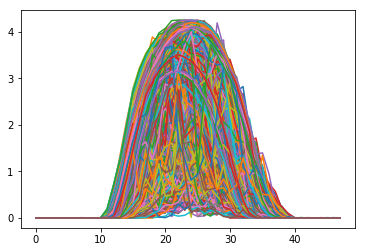

In [9]:
# plotting all data
SelectPV[time_columns].iloc[0,]
t = np.arange(0, 48)
for i in range(len(SelectPV)):
    plt.plot(t, SelectPV[time_columns].iloc[i,])
plt.show()

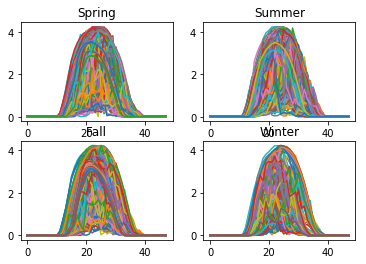

In [10]:
# plot by season
summer = [1,2,12];fall = [3,4,5]; winter = [6, 7, 8]; spring = [9,10,11]

f, axarr = plt.subplots(2, 2)

for index, row in SelectPV.loc[SelectPV['date'].dt.month.isin(spring)].iterrows():
    axarr[0, 0].plot(t, SelectPV[time_columns].loc[index,])
axarr[0, 0].set_title('Spring')

for index, row in SelectPV.loc[SelectPV['date'].dt.month.isin(summer)].iterrows():
    axarr[0, 1].plot(t, SelectPV[time_columns].loc[index,])
axarr[0, 1].set_title('Summer')

for index, row in SelectPV.loc[SelectPV['date'].dt.month.isin(fall)].iterrows():
    axarr[1, 0].plot(t, SelectPV[time_columns].loc[index,])
axarr[1, 0].set_title('Fall')

for index, row in SelectPV.loc[SelectPV['date'].dt.month.isin(winter)].iterrows():
    axarr[1, 1].plot(t, SelectPV[time_columns].loc[index,])
axarr[1, 1].set_title('Winter')
plt.show()

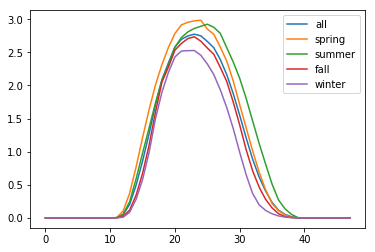

In [11]:
# average by season
plt.plot(t, SelectPV[time_columns].mean(), label='all')
plt.plot(t, SelectPV[SelectPV['date'].dt.month.isin(spring)].mean()[time_columns], label='spring')
plt.plot(t, SelectPV[SelectPV['date'].dt.month.isin(summer)].mean()[time_columns], label='summer')
plt.plot(t, SelectPV[SelectPV['date'].dt.month.isin(fall)].mean()[time_columns], label='fall')
plt.plot(t, SelectPV[SelectPV['date'].dt.month.isin(winter)].mean()[time_columns], label='winter')
plt.legend()
plt.show()

In [12]:
# check the daytime saving hours
# we see that the jump in 2010-10-03
SelectPV[SelectPV['date'].isin( ['2010-10-01' , '2010-10-02' , '2010-10-03' , '2010-10-04' , '2010-10-05' , '2010-10-06'])]

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
31795,157,9.99,2291,GG,2010-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.144,0.625,0.231,1.231,2.269,2.325,3.231,2.775,2.263,2.588,3.163,3.456,2.200,2.281,2.850,2.219,1.944,1.256,1.844,1.081,0.694,0.475,0.169,0.069,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31796,157,9.99,2291,GG,2010-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.081,0.219,0.519,1.119,1.656,2.675,2.800,1.538,1.950,2.144,1.719,1.194,1.350,1.031,1.294,1.131,0.838,0.288,0.331,0.306,0.094,0.100,0.031,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31797,157,9.99,2291,GG,2010-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.238,0.588,0.600,1.319,2.281,1.056,1.263,1.319,1.706,1.463,1.694,1.175,1.425,0.619,0.869,1.169,0.869,1.019,0.731,0.506,0.238,0.063,0.013,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31798,157,9.99,2291,GG,2010-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.031,0.100,0.338,0.731,1.594,1.600,2.313,1.575,1.806,2.138,2.250,2.156,2.169,1.650,1.975,1.813,2.250,1.638,1.438,0.975,0.788,0.356,0.156,0.119,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31799,157,9.99,2291,GG,2010-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.081,0.588,0.925,1.319,2.000,2.863,3.300,3.569,3.731,3.694,3.869,3.863,3.850,3.744,3.563,3.406,3.069,2.619,2.156,1.644,1.088,0.494,0.200,0.056,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31800,157,9.99,2291,GG,2010-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.081,0.406,1.319,2.206,1.600,0.875,3.113,3.744,3.663,3.813,3.788,3.506,3.488,3.981,3.538,3.250,3.075,2.644,2.169,1.663,1.100,0.550,0.175,0.056,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [13]:
# end of daytime saving
# shift back from 2011-04-03
SelectPV[SelectPV['date'].isin( ['2011-04-01' , '2011-04-02' , '2011-04-03' , '2011-04-04' , '2011-04-05' , '2011-04-06'])]

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
31995,157,9.99,2291,GG,2011-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.019,0.544,1.219,1.575,2.569,2.825,3.219,3.163,3.675,1.744,0.956,1.431,1.950,1.406,2.988,2.006,1.631,1.713,1.344,1.113,0.556,0.194,0.056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31996,157,9.99,2291,GG,2011-04-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.038,0.306,0.988,1.638,2.356,2.750,2.769,2.088,2.538,2.063,1.750,3.088,2.663,1.775,2.213,2.300,0.856,1.556,0.994,0.775,0.531,0.181,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31997,157,9.99,2291,GG,2011-04-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.363,1.038,1.544,2.394,2.838,3.144,3.350,3.263,1.863,3.675,3.600,3.538,3.381,3.150,2.863,2.488,2.069,1.575,1.044,0.531,0.181,0.050,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31998,157,9.99,2291,GG,2011-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025,0.469,1.031,0.963,0.375,1.225,1.125,0.800,2.663,2.888,3.738,2.106,2.131,2.138,3.156,2.363,2.050,2.069,1.581,0.956,0.675,0.156,0.050,0.006,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31999,157,9.99,2291,GG,2011-04-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.106,0.181,0.325,0.925,1.119,0.963,0.863,1.650,1.981,2.056,2.050,2.713,0.963,0.850,1.438,0.725,1.575,1.144,1.013,0.613,0.113,0.044,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
32000,157,9.99,2291,GG,2011-04-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.069,0.506,0.244,0.625,1.631,1.850,1.331,1.581,2.575,2.894,2.413,2.800,2.144,1.781,2.150,2.150,1.438,1.463,0.756,0.569,0.275,0.119,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN




## Divide Data into 'Summer' and 'Winter' by daylight saving time



In [14]:
start_daysaving = ['2010-10-03' , '2011-10-02','2012-10-07' ,'2013-10-06'  ]
end_daysaving = ['2011-04-03','2012-04-01','2013-04-07']
daysave_index = SelectPV[((start_daysaving[0] <= SelectPV['date']) &  (SelectPV['date']  < end_daysaving[0])) 
         | ((start_daysaving[1] <= SelectPV['date']) &  (SelectPV['date']  < end_daysaving[1]))
         | ((start_daysaving[2] <= SelectPV['date']) &  (SelectPV['date']  < end_daysaving[2]))
        | (start_daysaving[3] <= SelectPV['date'])].index.tolist()

## For winter 

In [228]:
df_winter = SelectPV.drop(daysave_index)
df_winter

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
31703,157,9.99,2291,GG,2010-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.038,0.263,0.538,0.944,1.431,1.438,1.900,1.594,2.919,3.069,2.756,2.350,2.463,2.125,1.500,1.150,0.756,0.331,0.113,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31704,157,9.99,2291,GG,2010-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.006,0.106,0.356,0.756,1.581,0.838,0.850,1.000,0.856,0.675,0.575,0.519,0.556,0.519,0.344,0.300,0.281,0.231,0.106,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31705,157,9.99,2291,GG,2010-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.094,0.294,0.619,1.500,2.144,2.613,2.919,2.806,3.081,2.994,2.925,2.763,2.525,2.206,1.825,1.381,0.900,0.425,0.106,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31706,157,9.99,2291,GG,2010-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.019,0.081,0.619,0.819,0.506,1.731,0.956,0.844,1.438,0.950,1.269,1.488,2.131,1.825,1.050,0.606,0.269,0.200,0.125,0.013,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31707,157,9.99,2291,GG,2010-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.013,0.056,0.431,0.400,0.163,0.294,0.631,0.956,1.675,1.269,1.031,1.225,1.331,1.175,1.125,0.688,0.425,0.263,0.094,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31708,157,9.99,2291,GG,2010-07-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.056,0.094,0.094,0.488,1.344,2.394,1.481,0.375,0.925,0.625,0.644,1.194,1.975,1.081,0.700,0.569,0.481,0.119,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31709,157,9.99,2291,GG,2010-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.019,0.119,0.413,1.356,1.875,1.850,1.231,1.656,1.294,2.863,2.013,1.081,0.988,0.706,0.956,0.869,0.575,0.081,0.056,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31710,157,9.99,2291,GG,2010-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.013,0.313,0.588,0.619,1.894,0.544,0.231,0.338,0.419,0.644,0.931,1.669,2.775,1.625,1.044,0.550,0.694,0.169,0.125,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31711,157,9.99,2291,GG,2010-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.081,0.300,0.219,0.556,0.813,1.750,2.175,1.613,2.931,1.213,0.981,0.806,0.331,1.025,0.619,0.088,0.100,0.056,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN
31712,157,9.99,2291,GG,2010-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.125,0.444,1.094,1.775,2.169,2.613,2.788,2.456,2.619,2.913,2.475,1.538,2.188,1.438,1.069,0.419,0.594,0.438,0.131,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,NaN


In [229]:
if 'last_site' not in df_winter.columns:
    df_winter['last_site'] = df_winter[time_columns].apply(lambda x: x.nonzero()[0][-1], axis=1)
if 'first_site' not in df_winter.columns:
    df_winter['first_site'] = df_winter[time_columns].apply(lambda x: x.nonzero()[0][0], axis=1)
odd_data1 = []; odd2 =[]

df_winter['last_site_time'] = df_winter['last_site'].apply(lambda x: time_columns[x])
df_winter['first_site_time'] = df_winter['first_site'].apply(lambda x: time_columns[x])
    
for idx in range(df_winter.shape[0]):
    if (df_winter[time_columns].iloc[idx,df_winter['last_site'].iloc[idx,]]  > 0) & (df_winter[time_columns].iloc[idx,df_winter['last_site'].iloc[idx,]-1]==0):
        df_winter.loc[df_winter.index.tolist()[idx],df_winter['last_site_time'].loc[df_winter.index.tolist()[idx],]] = 0.0
        df_winter['last_site'].iloc[idx,] = df_winter[time_columns].iloc[idx,].nonzero()[0][-1] # update last_site
        odd_data1.append(idx)
    if (df_winter[time_columns].iloc[idx,df_winter['first_site'].iloc[idx,]]  > 0) & (df_winter[time_columns].iloc[idx,df_winter['first_site'].iloc[idx,]+1]==0):
        df_winter.loc[df_winter.index.tolist()[idx],df_winter['first_site_time'].loc[df_winter.index.tolist()[idx],]] = 0.0
        df_winter['first_site'].iloc[idx,] = df_winter[time_columns].iloc[idx,].nonzero()[0][0] # update last_site
        odd2.append(idx)
display(odd_data1,odd2)
display(df_winter.iloc[odd_data1+odd2])

/Users/taku/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[27, 179, 227, 240, 242, 267, 355, 384, 537]

[13, 246, 351, 467]

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality,last_site,first_site,last_site_time,first_site_time
31730,157,9.99,2291,GG,2010-07-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.019,0.119,0.400,0.319,0.250,0.375,0.606,0.475,0.256,0.256,0.200,0.169,0.200,0.113,0.131,0.063,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,29,14,16:00,7:30
32082,157,9.99,2291,GG,2011-06-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.044,0.325,0.319,0.444,0.488,0.688,0.406,0.575,0.631,0.281,0.419,0.569,0.969,1.088,0.669,0.869,0.469,0.075,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,32,15,18:30,8:00
32130,157,9.99,2291,GG,2011-08-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.056,0.331,0.569,1.200,1.956,2.756,3.063,3.231,3.331,3.350,3.344,3.419,2.150,0.819,1.050,1.119,1.444,1.431,0.825,0.225,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,33,13,21:30,7:00
32143,157,9.99,2291,GG,2011-08-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.019,0.138,0.888,1.738,1.238,0.944,0.675,1.281,2.219,1.438,1.088,2.269,2.881,2.906,2.331,2.075,1.706,0.356,0.400,0.325,0.188,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,33,13,23:30,7:00
32145,157,9.99,2291,GG,2011-08-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.013,0.188,0.494,1.563,2.669,3.113,2.319,3.400,3.169,3.206,2.775,3.381,3.219,3.038,2.713,2.319,1.875,1.369,0.831,0.344,0.075,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,33,13,21:00,7:00
32170,157,9.99,2291,GG,2011-09-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.456,1.000,1.706,2.488,2.931,3.269,3.513,3.719,3.806,3.825,3.806,3.744,3.563,3.331,3.081,2.638,2.306,2.006,1.488,0.963,0.463,0.150,0.050,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,34,11,19:00,6:00
32423,157,9.99,2291,GG,2012-06-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.100,0.294,0.800,1.681,2.138,2.681,2.900,2.963,3.013,2.988,2.800,2.069,2.406,2.169,1.788,1.331,0.825,0.413,0.081,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,32,14,20:00,7:30
32452,157,9.99,2291,GG,2012-07-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.188,0.538,0.863,1.594,2.363,2.781,2.981,3.088,3.125,3.125,2.769,2.525,2.813,1.894,0.988,0.619,0.813,0.313,0.044,0.031,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,33,14,21:00,7:30
32769,157,9.99,2291,GG,2013-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.113,0.550,1.188,1.769,2.300,2.769,3.144,3.469,3.725,3.881,4.006,4.063,4.081,4.025,3.900,3.725,3.538,3.281,3.019,2.656,2.219,1.781,1.175,0.744,0.288,0.119,0.125,0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,39,12,22:30,6:30
31716,157,9.99,2291,GG,2010-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.019,0.081,0.138,1.694,2.694,3.000,2.569,3.163,3.038,2.894,2.681,2.344,1.931,1.381,0.975,0.494,0.138,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,33,16,17:00,7:30


We observe some 'odd' data.  
They seem to have too large sunset time, so we remove them.

73


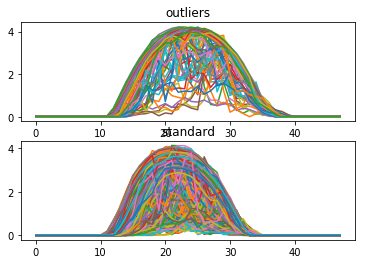

In [236]:
sunset_max = 36
winter_outliers = df_winter[df_winter['last_site']>=sunset_max].index.tolist()
print(len(winter_outliers))
f, ax = plt.subplots(2, 1)
for i in winter_outliers:
    ax[0].plot(t, df_winter[df_winter['last_site']>=sunset_max][time_columns].loc[i,])
ax[0].set_title('outliers')
for i in df_winter.drop(winter_outliers).index.tolist():
    ax[1].plot(t, df_winter[time_columns].loc[i,])
ax[1].set_title('standard')
plt.show()

## For summer data

In [237]:
# data with daysaving (summer)
SummerPV = SelectPV.loc[daysave_index]
# SummerPV = SummerPV[time_columns]
SummerPV

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
31797,157,9.99,2291,GG,2010-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.238,0.588,0.600,1.319,2.281,1.056,1.263,1.319,1.706,1.463,1.694,1.175,1.425,0.619,0.869,1.169,0.869,1.019,0.731,0.506,0.238,0.063,0.013,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31798,157,9.99,2291,GG,2010-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.031,0.100,0.338,0.731,1.594,1.600,2.313,1.575,1.806,2.138,2.250,2.156,2.169,1.650,1.975,1.813,2.250,1.638,1.438,0.975,0.788,0.356,0.156,0.119,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31799,157,9.99,2291,GG,2010-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.081,0.588,0.925,1.319,2.000,2.863,3.300,3.569,3.731,3.694,3.869,3.863,3.850,3.744,3.563,3.406,3.069,2.619,2.156,1.644,1.088,0.494,0.200,0.056,0.006,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31800,157,9.99,2291,GG,2010-10-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.081,0.406,1.319,2.206,1.600,0.875,3.113,3.744,3.663,3.813,3.788,3.506,3.488,3.981,3.538,3.250,3.075,2.644,2.169,1.663,1.100,0.550,0.175,0.056,0.006,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31801,157,9.99,2291,GG,2010-10-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.113,0.531,1.100,1.106,0.525,0.456,0.688,1.231,0.881,0.831,1.150,3.100,2.906,3.175,2.725,1.731,0.981,0.444,0.575,0.494,0.431,0.275,0.150,0.031,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31802,157,9.99,2291,GG,2010-10-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.119,0.294,0.738,0.569,0.725,1.288,1.344,1.588,1.631,2.744,2.738,1.706,0.994,0.700,0.544,0.444,0.338,0.413,0.381,0.156,0.056,0.081,0.038,0.013,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31803,157,9.99,2291,GG,2010-10-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.044,0.113,0.175,0.269,0.438,0.325,0.456,0.406,0.381,0.550,0.469,0.506,0.556,0.419,0.775,0.425,0.250,0.344,0.350,0.131,0.025,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31804,157,9.99,2291,GG,2010-10-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.238,0.631,1.100,2.356,0.900,2.775,3.656,2.875,1.563,0.956,2.225,4.150,3.588,3.838,3.869,3.544,2.538,2.169,1.563,1.744,0.931,0.675,0.319,0.081,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31805,157,9.99,2291,GG,2010-10-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.031,0.138,0.319,0.388,1.069,1.413,3.231,2.700,2.563,2.088,3.213,3.969,4.100,3.475,3.988,3.625,3.256,2.713,2.088,1.406,1.056,0.588,0.225,0.075,0.013,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
31806,157,9.99,2291,GG,2010-10-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.075,0.813,1.144,2.206,2.638,2.850,2.406,2.525,1.550,2.050,2.894,3.344,2.881,2.731,2.438,2.413,2.494,2.644,2.256,1.681,1.119,0.594,0.225,0.138,0.025,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [238]:
if 'last_site' not in SummerPV.columns:
    SummerPV['last_site'] = SummerPV[time_columns].apply(lambda x: x.nonzero()[0][-1], axis=1)
if 'first_site' not in SummerPV.columns:
    SummerPV['first_site'] = SummerPV[time_columns].apply(lambda x: x.nonzero()[0][0], axis=1)
odd_data1 = []; odd2 =[]

SummerPV['last_site_time'] = SummerPV['last_site'].apply(lambda x: time_columns[x])
SummerPV['first_site_time'] = SummerPV['first_site'].apply(lambda x: time_columns[x])
    
for idx in range(SummerPV.shape[0]):
    if (SummerPV[time_columns].iloc[idx,SummerPV['last_site'].iloc[idx,]]  > 0) & (SummerPV[time_columns].iloc[idx,SummerPV['last_site'].iloc[idx,]-1]==0):
        SummerPV.loc[SummerPV.index.tolist()[idx],SummerPV['last_site_time'].loc[SummerPV.index.tolist()[idx],]] = 0.0
        SummerPV['last_site'].iloc[idx,] = SummerPV[time_columns].iloc[idx,].nonzero()[0][-1] # update last_site
        odd_data1.append(idx)
    if (SummerPV[time_columns].iloc[idx,SummerPV['first_site'].iloc[idx,]]  > 0) & (SummerPV[time_columns].iloc[idx,SummerPV['first_site'].iloc[idx,]+1]==0):
        SummerPV.loc[SummerPV.index.tolist()[idx],SummerPV['first_site_time'].loc[SummerPV.index.tolist()[idx],]] = 0.0
        SummerPV['first_site'].iloc[idx,] = SummerPV[time_columns].iloc[idx,].nonzero()[0][0] # update last_site
        odd2.append(idx)
display(odd_data1,odd2)
display(SummerPV.iloc[odd_data1+odd2])

/Users/taku/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[29, 43, 340, 435]

[11, 391]

,Customer,Generator Capacity,Postcode,Consumption Category,date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality,last_site,first_site,last_site_time,first_site_time
31826,157,9.99,2291,GG,2010-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.025,0.188,0.563,0.969,1.019,1.144,2.069,2.725,1.181,1.325,0.881,0.294,0.144,1.369,1.444,0.106,0.063,0.456,0.100,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,31,12,17:00,6:30
31840,157,9.99,2291,GG,2010-11-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013,0.256,0.706,1.331,1.906,2.063,2.725,2.806,2.588,3.013,2.419,2.075,1.200,0.969,1.438,1.763,0.688,0.244,0.169,0.119,0.200,0.088,0.019,0.038,0.013,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,35,11,19:00,6:00
32318,157,9.99,2291,GG,2012-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.094,0.288,0.550,1.475,2.131,2.525,2.894,2.969,2.831,2.981,2.888,2.706,2.469,2.163,1.794,1.375,0.894,0.431,0.119,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,32,14,18:30,7:30
32602,157,9.99,2291,GG,2012-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.288,0.850,1.469,2.038,2.525,2.944,3.250,3.506,3.706,3.825,3.863,3.981,4.088,4.069,4.000,3.744,1.544,2.094,2.763,2.450,1.013,1.144,1.106,0.656,0.494,0.300,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,38,12,23:00,6:30
31808,157,9.99,2291,GG,2010-10-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.006,0.394,1.400,0.894,1.838,3.588,2.869,3.894,3.863,3.544,2.775,3.344,2.481,3.363,2.313,2.881,2.488,1.750,1.744,1.181,0.531,0.325,0.156,0.031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,37,14,19:00,6:30
32558,157,9.99,2291,GG,2012-11-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.113,1.881,0.769,2.713,3.175,3.819,3.938,4.025,3.713,4.150,3.956,3.688,3.700,3.425,3.200,0.588,1.150,0.569,0.413,0.694,0.381,0.225,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,38,16,19:30,7:30


For summer data, we keep all data

0


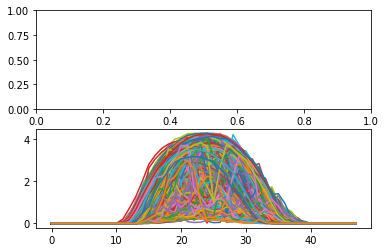

In [242]:
sunset_max = 41
summer_outliers = SummerPV[SummerPV['last_site']>=sunset_max].index.tolist()
print(len(summer_outliers))
f, ax = plt.subplots(2, 1)
for i in summer_outliers:
    ax[0].plot(t, SummerPV[SummerPV['last_site']>=sunset_max][time_columns].loc[i,])
for i in SummerPV.drop(summer_outliers).index.tolist():
    ax[1].plot(t, SummerPV[time_columns].loc[i,])
# plt.show()

In [243]:
# data without daysaving (winter)
# WinterPV = SelectPV.drop(daysave_index)
# WinterPV = WinterPV[time_columns]
# WinterPV

In [244]:
# # check some outliers 
# for df in [WinterPV, SummerPV]:
#     if 'last_site' not in df.columns:
#         df['last_site'] = df.apply(lambda x: x.nonzero()[0][-1], axis=1)
#     if 'first_site' not in df.columns:
#         df['first_site'] = df.apply(lambda x: x.nonzero()[0][0], axis=1)
#     odd_data1 = []; odd2 =[]
#     for index in range(df.shape[0]):
#         if (df.iloc[index,df['last_site'].iloc[index,]]  > 0) & (df.iloc[index,df['last_site'].iloc[index,]-1]==0):
#             odd_data1.append(index)
#         if (df.iloc[index,df['first_site'].iloc[index,]]  > 0) & (df.iloc[index,df['first_site'].iloc[index,]+1]==0):
#             odd2.append(index)
#     display(odd_data1,odd2)
#     for idx in odd_data1:
#         df.iloc[idx,df['last_site'].iloc[idx,]] = 0.0
#     for idx in odd2:
#         df.iloc[idx,df['first_site'].iloc[idx,]] = 0.0
#     display(df.iloc[odd_data1+odd2])

Clean up for making csv

In [247]:
WinterPV = df_winter.drop(winter_outliers)
SummerPV = SummerPV.drop(summer_outliers)
WinterPV.shape, SummerPV.shape

((481, 58), (542, 58))

## Save as csv

In [248]:
# save data as csv
csvname = str(selectID) + '_' + str(selectCapacity) +'_summer.csv'
SummerPV.to_csv(csvname, index=False,columns=time_columns,header=False)
# winter 
csvname = str(selectID) + '_' + str(selectCapacity) +'_winter.csv'
# csvname
WinterPV.to_csv(csvname, index=False,columns=time_columns,header=False)

In [249]:
# also save the summer data with shifting back time by 1 h
back_Summer = SummerPV[time_columns].shift(-2,axis = 1)
back_Summer.fillna(0,inplace=True)
csvname = str(selectID) + '_' + str(selectCapacity) +'_summer_shift.csv'
back_Summer.to_csv(csvname,index=False,header=False)